<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/Prueba_de_Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRUEBA KOLMOGOROV- SMIRNOV

##SIMULACIÓN

**Estudiante:** Karla Michelle Soriano Sánchez

**Objetivo**: Elaborar un código en Python que implemente la Prueba de Kolmogorov- Smirnov  para evaluar si un conjutno de números pseudoaleatorios sigue una distribución uniforme en el intervalo (0,1)

## Justificación teórica
La prueba de Kolmogorov- Smirnov es una prueba no parametrica que permite comparar la función de distribución empiríca con la función teórica especifica.

La idea de esta aplicación de prueba es verificar que dado un conjunto de datos, esté siga una distribución uniforme U(0,1).

###Planteamiento de la hipotesis

Definiremos la prueba de hipotesis de la siguiente manera:

- *Hipotesis nula*
$H_0$: Los datos (muestra) provienen de una distribución uniforme $U(0,1)$

- *Hipotesis alternativa*  $H_1$: Los datos (muestra) NO provienen de una distribución uniforme $U(0,1)$


### Función de distribución teórica

Para una variable aleatoria X ~ U(0,1), la función de distribución acumulada es:

$$F(x) =
\begin{cases}
0, & x < 0 \\
x, & 0 \le x \le 1 \\
1, & x > 1
\end{cases}$$

Es decir, dentro del intervalo $(0,1)$, se cumple:

$$F(x) = x$$

### Función de distribución empírica

Sea una muestra ordenada:

$$x_1 \leq x_2  \leq x_2  \leq \dots \leq x_n $$

La función de distribución empírica se define como:

$$ F_n(x) = \frac{i}{n} \quad \text{para} \quad x_i ≤ x < x_{i+1}$$

Esta función representa la proporción acumulada de observaciones menores o iguales que $x$

### Estadistico de prueba.

Tomando en cuenta que la prueba de Kolmogorov- Smirnov se basa en medir la máxima diferencia absoluta entre la función empírica y la función teórica:

$$D_n = \sup_x | F_n(x) - F(x)| $$

En la practica, el estadisitco de prueba, puede calcularse como:

$$
D^+ = \max \left( \frac{i}{n} - x_i \right)$$

$$ D^- = \max \left( x_i - \frac{i-1}{n} \right) $$

Entonces:

$$D_n = \max(D^+, D^-) $$

Dado que este valor representa la mayor difrencia entre la distribución observada y la distribución teórica uniforme.

### valor critico
Para un  valor de confianza $ \alpha$, el valor critico esta dado por:


$$D_α = \frac{K_α}{\sqrt{n}}$$

donde:

$$K_α = 1.36 \quad \text{para} \quad α = 0.05$$

Por lo tanto:

$D_α = \frac{1.36}{\sqrt{n}}$


### Regla de decisión

* Si $_n < D_α$ entonces no se rechaza H₀.

* Si $D_n > D_α$ entonces se rechaza H₀.



Si no se rechaza H₀, se concluye que no existe evidencia estadística
suficiente para afirmar que los datos no siguen una distribución
Uniforme U(0,1). Esto indica que el generador presenta un comportamiento
consistente con la uniformidad esperada.

In [10]:
import numpy as np             #utilizada para manejo de arreglos y cálculos númericos
import pandas as pd            #organiza los reultados en una tabla
from tabulate import tabulate  #da formato visual a la tabla
import matplotlib.pyplot as plt #graficar el histograma
from math import sqrt

In [11]:
#son los datos proporcionados en la imagen

data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

n=len(data)
print(f"El número total de datos es: {n}")

El número total de datos es: 100


In [12]:
def kolmogorov_smirnov(datos, alpha):
    """
    Esta función calcula el estadístico de la prueba
    de Kolmogorov–Smirnov para verificar si los datos
    siguen una distribución Uniforme U(0,1).

    Parámetros:
        datos : lista de números
        alpha : nivel de significancia

    Retorna:
        datos ordenados y tamaño de muestra
    """

    # 1. Ordenar los datos de menor a mayor
    datos = sorted(datos)
    n = len(datos)  # Tamaño de muestra

    tabla = []      # Lista para construir la tabla
    D_plus = []     # Lista para almacenar valores D+
    D_minus = []    # Lista para almacenar valores D-

    # 2. Cálculo de D+ y D-
    for i in range(n):

        # Fórmulas teóricas
        Dp = (i+1)/n - datos[i]     # D+
        Dm = datos[i] - (i)/n       # D-

        # Guardar valores para encontrar máximos
        D_plus.append(Dp)
        D_minus.append(Dm)

        # Construcción de tabla para visualización
        tabla.append([
            i+1,
            round(datos[i],5),
            round(i/n,5),
            round((i+1)/n,5),
            round(Dm,5),
            round(Dp,5)
        ])

    # 3. Estadístico de prueba
    D_calculado = max(max(D_plus), max(D_minus))

    # 4. Punto crítico clásico para α = 0.05
    D_critico = 1.36 / np.sqrt(n)

    # 5. Mostrar tabla
    encabezados = ["i", "xi", "(i-1)/n", "i/n", "D-", "D+"]
    print(tabulate(tabla, headers=encabezados, tablefmt="psql"))

    # 6. Mostrar resultados
    print("\nTamaño de muestra n =", n)
    print("D calculado =", round(D_calculado,5))
    print("D crítico =", round(D_critico,5))

    # 7. Decisión estadística
    if D_calculado > D_critico:
        print("\nSe rechaza H0: Los datos NO provienen de una distribución uniforme U(0,1)")
    else:
        print("\nNo se rechaza H0: Los datos provienen de una distribución uniforme U(0,1)")
    return datos, n

In [13]:
alpha = 0.05
datos_ordenados, n = kolmogorov_smirnov(data, alpha)

+-----+---------+-----------+-------+----------+----------+
|   i |      xi |   (i-1)/n |   i/n |       D- |       D+ |
|-----+---------+-----------+-------+----------+----------|
|   1 | 0.00121 |      0    |  0.01 |  0.00121 |  0.00879 |
|   2 | 0.03185 |      0.01 |  0.02 |  0.02185 | -0.01185 |
|   3 | 0.03272 |      0.02 |  0.03 |  0.01272 | -0.00272 |
|   4 | 0.0501  |      0.03 |  0.04 |  0.0201  | -0.0101  |
|   5 | 0.0523  |      0.04 |  0.05 |  0.0123  | -0.0023  |
|   6 | 0.05475 |      0.05 |  0.06 |  0.00475 |  0.00525 |
|   7 | 0.07281 |      0.06 |  0.07 |  0.01281 | -0.00281 |
|   8 | 0.08128 |      0.07 |  0.08 |  0.01128 | -0.00128 |
|   9 | 0.09133 |      0.08 |  0.09 |  0.01133 | -0.00133 |
|  10 | 0.09264 |      0.09 |  0.1  |  0.00264 |  0.00736 |
|  11 | 0.10699 |      0.1  |  0.11 |  0.00699 |  0.00301 |
|  12 | 0.1085  |      0.11 |  0.12 | -0.0015  |  0.0115  |
|  13 | 0.11537 |      0.12 |  0.13 | -0.00463 |  0.01463 |
|  14 | 0.12079 |      0.13 |  0.14 | -0

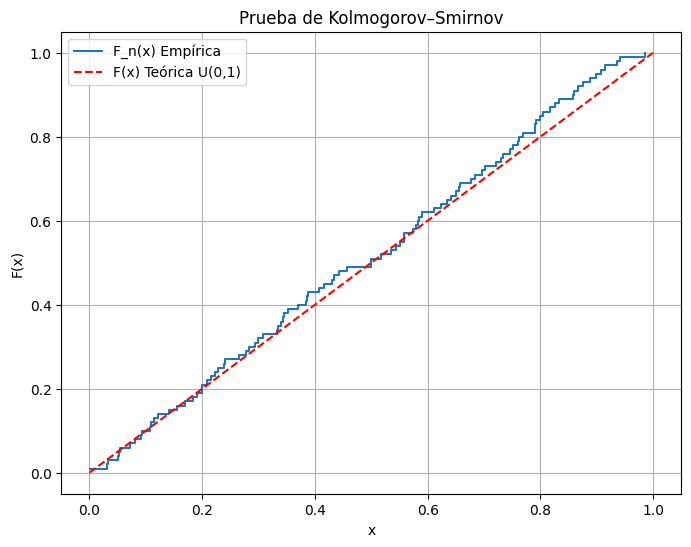

In [14]:
# Función empírica acumulada
y_empirica = np.arange(1, n+1)/n

# Dominio teórico uniforme
x_teorico = np.linspace(0,1,200)

plt.figure(figsize=(8,6))

# F_n(x)
plt.step(datos_ordenados, y_empirica, where='post',
         label="F_n(x) Empírica")

# F(x) = x
plt.plot(x_teorico, x_teorico, 'r--',
         label="F(x) Teórica U(0,1)")

plt.title("Prueba de Kolmogorov–Smirnov")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

Se observa que la función empírica
$F_n(x)$ es muy cercana
a la función teórica $F(x)=x$.

Además, el estadístico $D_n$ resulta menor que el valor
crítico $D_α$ para $α = 0.05$.

Por lo tanto, no existe evidencia estadística suficiente
para rechazar la hipótesis nula.

Se concluye que los datos son consistentes con una
distribución Uniforme U(0,1).

Con un nivel de significancia α = 0.05 se obtuvo:

D_calculado = ___
D_crítico = ___

Como $D_{calculado} < D_{crítico}$, no se rechaza la hipótesis nula.

Por lo tanto, no existe evidencia suficiente para afirmar que los datos
no siguen una distribución Uniforme U(0,1).

Esto indica que el generador presenta un comportamiento consistente con
la uniformidad esperada.